# <center> Visualizing the Lorenz Curve and Gini Coeffecient </center>

The Gini coefficient is a measure of inequality that quantifies the distribution of income or wealth within a population. It ranges from 0 to 1, where 0 indicates perfect equality (everyone has the same income) and 1 indicates perfect inequality (one person has all the income).

To calculate the Gini coefficient, we use the Lorenz curve, which represents the cumulative distribution of income against the cumulative population. The Gini coefficient can be derived from the Lorenz curve by assessing the area between the Lorenz curve and the line of equality (the diagonal line representing perfect equality).

Using the data from "income_shares.csv," I calculated and plotted the time series of the Gini coefficient from 1967 to 2019.

Additionally, I compared the Lorenz curves for the years 1967 and 2019 to illustrate how income distribution has changed over time.

In [2]:
#libraries that will be used in this HW 
import os
import shutil as sh
import pandas as pd
#you can add other libraries as needed
import numpy as np
import datetime
import numpy as np
from scipy.interpolate import interp1d
import scipy.integrate as si
import matplotlib.pylab as plt
%matplotlib inline 
import math
print('packages loaded...')

packages loaded...


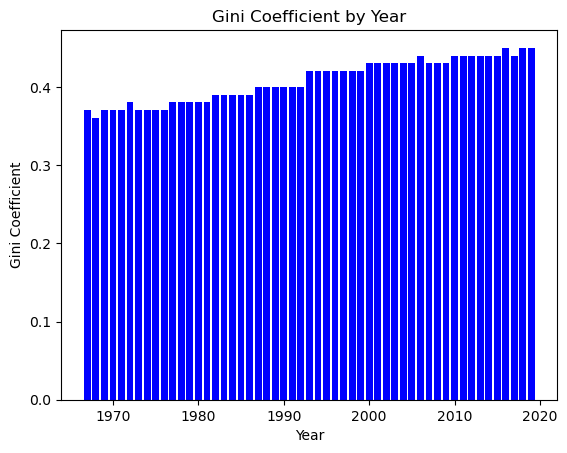

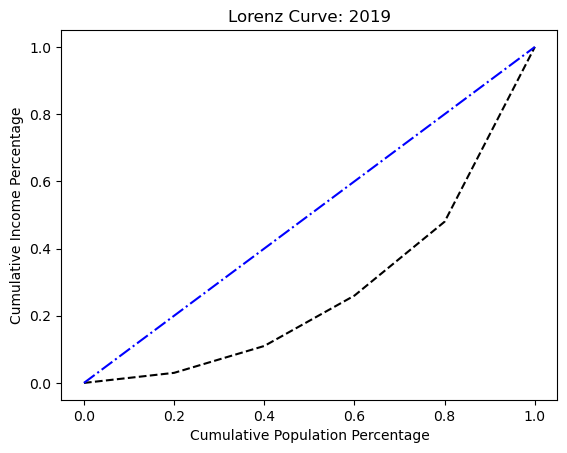

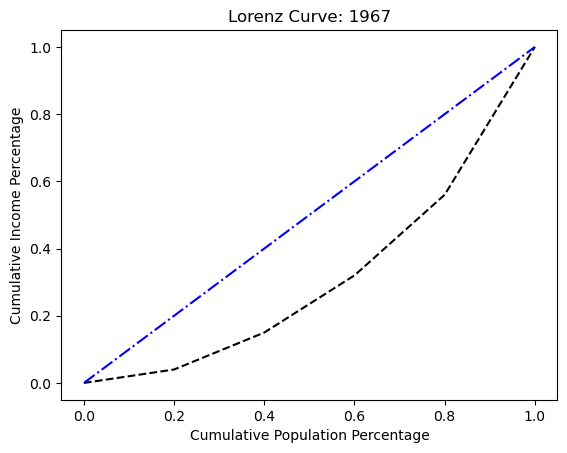

In [6]:

def q():
    # Read and process income data
    income_data = read_income_data('income_shares.csv')

    # Calculate Lorenz curve data
    cumsum_data, cumulative_population = calculate_lorenz_curve(income_data)

    # Calculate Gini coefficients
    gini_coefficients = calculate_gini_coefficient(cumsum_data, cumulative_population)

    # Plot Gini coefficient over the years
    plot_gini_coefficient(gini_coefficients)
    
    # Plot Lorenz curves for specific years
    plot_lorenz_curve(cumsum_data, cumulative_population, 2019)
    plot_lorenz_curve(cumsum_data, cumulative_population, 1967)

    
    def read_income_data(file_path):
        # Read income shares data from CSV
        data = pd.read_csv(file_path, skiprows=1)
        data = pd.DataFrame(data[:-2])
        data.columns = ['Year', 'No_Households', 'LowestFifth', 'SecondFifth', 'ThirdFifth', 'FourthFifth', 'HighestFifth', 'Top5']
        return data
    
    #function to read in data and calculate lorenz curve...
    def calculate_lorenz_curve(data):
        cumsum_data = data[['LowestFifth', 'SecondFifth', 'ThirdFifth', 'FourthFifth', 'HighestFifth', 'Top5']].cumsum(axis = 1)
        cumsum_data = round(cumsum_data/100,2)
        cumsum_data.insert(0,'Default',0)
        cumsum_data = pd.concat([data['Year'].astype(int), cumsum_data], axis = 1)
        cumulative_population = []
        for i in range(6):
            cumulative_population.append((i)*.20)
        return cumsum_data, cumulative_population
        
    #function that pltos lorenz curve... 
    def lorenz_curve_plot(data,cumulative_population,year):
        cumulative_income = data[data['Year'] == year ].iloc[0,1:7].values.tolist()
        plt.plot(cumulative_population,cumulative_income, color = 'black', linestyle = '--')
        plt.plot(cumulative_income,cumulative_income, color = 'blue', linestyle = '-.')
        plt.xlabel('Cumulative Population Percentage')
        plt.ylabel('Cumulative Income Percentage')
        plt.title(f'Lorenz Curve: {year}')
        plt.savefig(f'Lorenze_Curve_{year}.pdf')
        plt.show()
    
    def calculate_gini_coefficient(cumsum_data, cumulative_population):
        gini_coef = {}
        for index, row  in data.iterrows():
            total_area = 0
            for key in range(1,len(cumulative_population)):
                x0 = cumulative_population[key-1]
                x1 = cumulative_population[key]
                y0 = row.iloc[key]
                y1 = row.iloc[key+1]
                width = x1 - x0
                average_height = (y0 + y1) / 2
                total_area += average_height * width
    
            gini_coef[row['Year']] = round(1-2*total_area,2)
        return gini_coef
        
    def plot_gini_coefficient(gini_coef):
        plt.bar(gini_coef.keys(), gini_coef.values(), color='blue')
        plt.xlabel('Year')
        plt.ylabel('Gini Coefficient')
        plt.title('Gini Coefficient by Year')
        plt.show()

    def plot_lorenz_curve(cumsum_data, cumulative_population, year):
        cumulative_income = cumsum_data[cumsum_data['Year'] == year].iloc[0, 1:7].values.tolist()
        plt.plot(cumulative_population, cumulative_income, color='black', linestyle='--')
        plt.plot(cumulative_income, cumulative_income, color='blue', linestyle='-.')
        plt.xlabel('Cumulative Population Percentage')
        plt.ylabel('Cumulative Income Percentage')
        plt.title(f'Lorenz Curve: {year}')
        plt.savefig(f'Lorenz_Curve_{year}.pdf')
        plt.show()

# Call the main function
q2()
    
